In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

print(pd.__version__)

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')

# Convert dataset to pandas DataFrame
df = dataset['train'].to_pandas()

# Data Clean Up
# Change string to datetime ('job_posted_date' column)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert 'job_skills' string list to a python list
import ast
df['job_skills'] = df['job_skills'].apply(lambda string_list: ast.literal_eval(string_list) if pd.notna(string_list) else string_list)


2.2.3


In [21]:
import seaborn as sns

In [22]:
df_DA_US = df[
    (df['job_title_short'] == 'Data Analyst') & 
    (df['job_country'] == 'United States')
    ].copy()

df_DA_US.dropna(subset=['job_skills', 'salary_year_avg'], inplace=True)

In [23]:
df_DA_US_exploded = df_DA_US.explode('job_skills').copy()

df_skill_count_salary = df_DA_US_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median'),
)

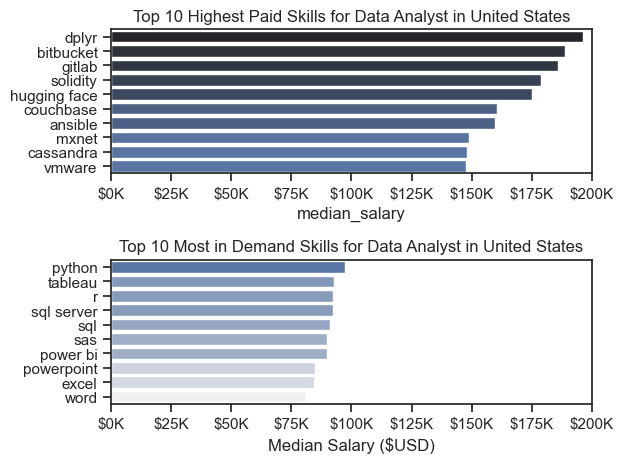

In [24]:
dict_plot = {
    'median_salary': 'Top 10 Highest Paid Skills for Data Analyst in United States',
    'skill_count' : 'Top 10 Most in Demand Skills for Data Analyst in United States'
}

fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')

for i, (col, title) in enumerate(dict_plot.items()):
    if col == 'skill_count':
            df = df_skill_count_salary.sort_values(by= col, ascending=False)['median_salary'].head(10).sort_values(ascending=False)
            df = df.reset_index().set_index('job_skills')
            sns.barplot(data=df, x='median_salary', y=df.index, ax=ax[i], hue='median_salary', palette='light:b')
    else:
        df = df_skill_count_salary.sort_values(by= col, ascending=False)['median_salary'].head(10)
        df = df.reset_index().set_index('job_skills')
        sns.barplot(data=df, x='median_salary', y=df.index, ax=ax[i], hue='median_salary', palette='dark:b_r')
    ax[i].set_title(title)
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
    ax[i].set_xlim(0, 200000)
    if col == 'skill_count':
        ax[i].set_xlabel('Median Salary ($USD)')
    ax[i].set_ylabel('')
    #ax[i].invert_yaxis()
    ax[i].legend().remove()
plt.tight_layout() 
plt.show()  

In [25]:
df = df_skill_count_salary.sort_values(by= col, ascending=False)['median_salary'].head(10).sort_values(ascending=False)


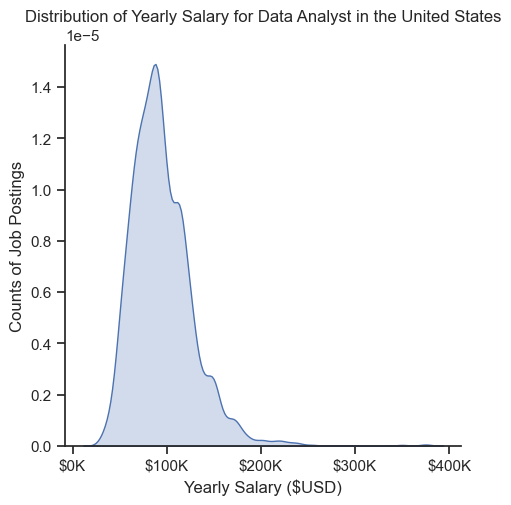

In [28]:
#f_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
sns.displot(df_DA_US['salary_year_avg'], 
             kind='kde',
             fill=True)
ax = plt.gca()

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Counts of Job Postings')
plt.title('Distribution of Yearly Salary for Data Analyst in the United States')

plt.show()

/var/folders/pm/tv1hfy992j7c66s1rw0vxmqc0000gn/T/ipykernel_85700/1111193412.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


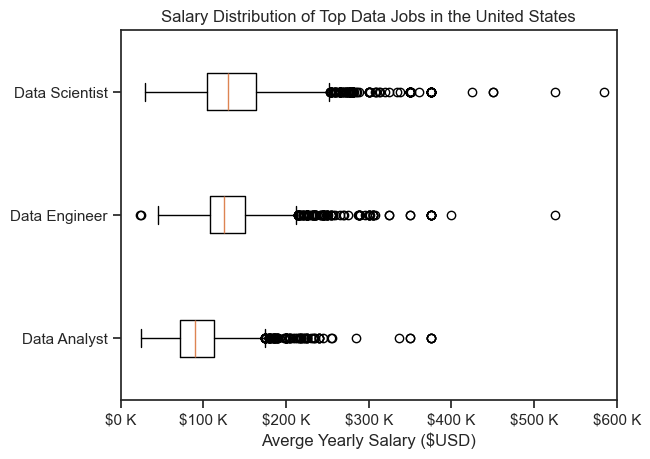

In [32]:
# Convert dataset to pandas DataFrame
df = dataset['train'].to_pandas()
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[
    (df['job_title_short'].isin(job_titles)) &
    (df['job_country'] == 'United States')
    ].copy()

df_US.dropna(subset=['salary_year_avg'], inplace=True)

job_list = [df_US[df_US['job_title_short'] == job]['salary_year_avg'] for job in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution of Top Data Jobs in the United States')
plt.xlabel('Averge Yearly Salary ($USD)')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)} K' ))
plt.xlim(0, 600000)
plt.show()

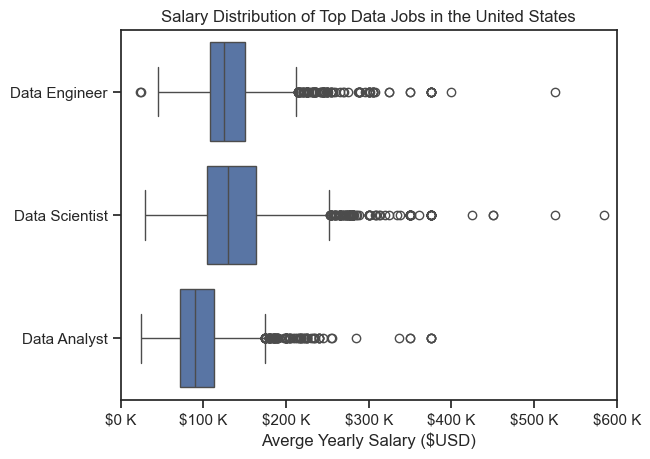

In [38]:
sns.boxplot(data=df_US,x='salary_year_avg', y='job_title_short')  
plt.title('Salary Distribution of Top Data Jobs in the United States')
plt.xlabel('Averge Yearly Salary ($USD)')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)} K' ))
plt.xlim(0, 600000)
plt.ylabel('')

plt.show()
